<a href="https://colab.research.google.com/github/Ahmadsad/ID2211-Project/blob/master/templateTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install matplotlib
!pip install SimpleITK

     |████████████████████████████████| 47.4MB 67kB/s 


In [44]:
import matplotlib.pyplot as plt
import helpers as h
import numpy as np

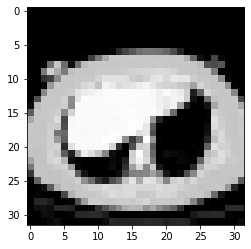

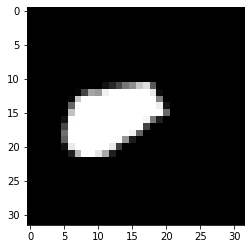

In [6]:
scaling_factor = 16
image_file_name = "IMG-0002-00074.dcm"
gt_file_name = "liver_GT_074.png"
image = h.get_image(image_file_name, scaling_factor=scaling_factor)
gt_image = h.get_ground_truth_image(gt_file_name, scaling_factor=scaling_factor)

# plot image
plt.imshow(image, cmap='gray')
plt.show()

# plot gt
plt.imshow(gt_image, cmap='gray')
plt.show()

In [ ]:
similarity_matrix = h.build_similarity_matrix(image, use_spatial=False)

In [ ]:
labels, eigenvalues, eigenvectors = h.get_spectral_clustering(similarity_matrices[2], n_clusters=10)

cluster_image = h.get_cluster_image(labels, image.shape)

plt.imshow(cluster_image, cmap="gray")
plt.show()

plt.plot(eigenvalues)
plt.show()
plt.plot(eigenvectors)
plt.show()

In [ ]:
# Get simi matrices No spatial, the list of graphs are sorted as same order as images below
# [row_image, normalized_image, thresholded_rowImage, amplified_rowImage, threshed_amplified_rowImage]
similarity_matrices_noSpatial = []

similarity_matrices_noSpatial.append(h.build_similarity_matrix(h.get_image(image_file_name, scaling_factor=scaling_factor), use_spatial=False))
similarity_matrices_noSpatial.append(h.build_similarity_matrix(h.get_image(image_file_name, scaling_factor=scaling_factor, normalize=True), use_spatial=False))
similarity_matrices_noSpatial.append(h.build_similarity_matrix(h.get_image(image_file_name, scaling_factor=scaling_factor, normalize=True, apply_threshold=True), use_spatial=False))
similarity_matrices_noSpatial.append(h.build_similarity_matrix(h.get_image(image_file_name, scaling_factor=scaling_factor, normalize=True, amplify_edges=True), use_spatial=False))
similarity_matrices_noSpatial.append(h.build_similarity_matrix(h.get_image(image_file_name, scaling_factor=scaling_factor, normalize=True, apply_threshold=True, amplify_edges=True), use_spatial=False))


In [ ]:
# Get simi matrices with spatial, the list of graphs are sorted as same order as images below
# [row_image, normalized_image, thresholded_rowImage, amplified_rowImage, threshed_amplified_rowImage]
similarity_matrices = []

similarity_matrices.append(h.build_similarity_matrix(h.get_image(image_file_name, scaling_factor=scaling_factor), use_spatial=True))
similarity_matrices.append(h.build_similarity_matrix(h.get_image(image_file_name, scaling_factor=scaling_factor, normalize=True), use_spatial=True))
similarity_matrices.append(h.build_similarity_matrix(h.get_image(image_file_name, scaling_factor=scaling_factor, normalize=True, apply_threshold=True), use_spatial=True))
similarity_matrices.append(h.build_similarity_matrix(h.get_image(image_file_name, scaling_factor=scaling_factor, normalize=True, amplify_edges=True), use_spatial=True))
similarity_matrices.append(h.build_similarity_matrix(h.get_image(image_file_name, scaling_factor=scaling_factor, normalize=True, apply_threshold=True, amplify_edges=True), use_spatial=True))


In [149]:
# build segmentation masks/cluster.labeles and graphs
masks_withSpatial = []
masks_withoutSpatial = []
graphs_withSpatial = []
graphs_withoutSpatial = []
for i in range(len(similarity_matrices)):
  labels, _, _ = h.get_spectral_clustering(similarity_matrices[i], n_clusters=10)
  masks_withSpatial.append(h.get_cluster_image(labels, image.shape))
  graphs_withSpatial.append(h.build_graph_of_simiMatrix(similarity_matrices[i]))

  labels, _, _ = h.get_spectral_clustering(similarity_matrices_noSpatial[i], n_clusters=10)
  masks_withoutSpatial.append(h.get_cluster_image(labels, image.shape))
  graphs_withoutSpatial.append(h.build_graph_of_simiMatrix(similarity_matrices_noSpatial[i]))

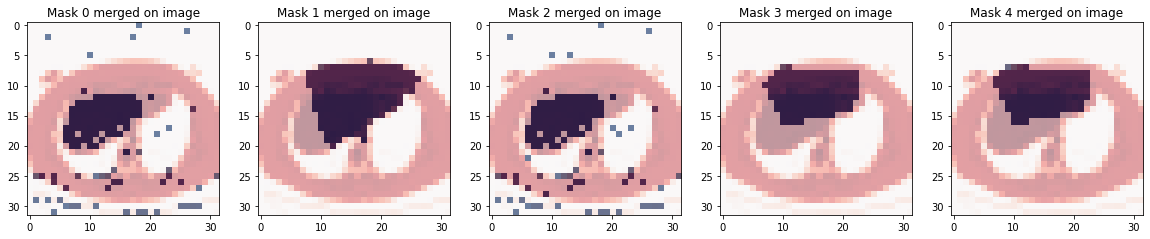

In [147]:
# with spatial information
clusters = [2, 1, 2, 9, 4]
h.plot_multiple_masks(masks_withSpatial, clusters, image)

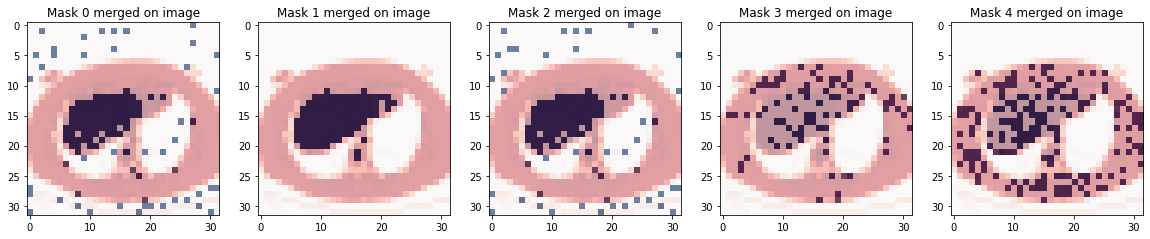

In [148]:
# without spatial information
clusters = [1, 4, 2, 7, 5]
h.plot_multiple_masks(masks_withoutSpatial, clusters, image)

Evaluation of graphs

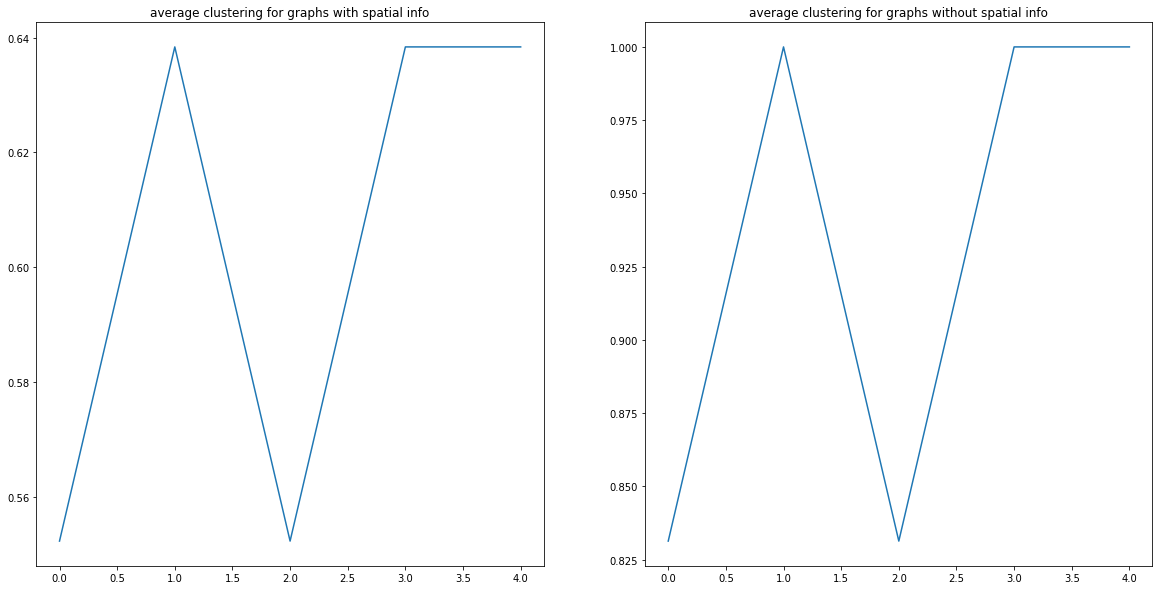

In [189]:
# almost all of below can be obtained for each graph (the most intresting graphs)
# lbl = 1
# nc = h.get_normalizedCut_value(g, np.where(masks_withoutSpatial[0]==lbl))
# sub = h.get_subgrapg(g, clustering_lbls)
# inf = h.get_general_graph_info(g)
# hist = h.plt_graph_hist(g)

avgs_cc_withSpatial= []
avgs_cc_withoutSpatial = []
for i in range(len(graphs_withoutSpatial)):
  avgs_cc_withSpatial.append(h.get_avg_cluster_coef(graphs_withSpatial[i]))
  avgs_cc_withoutSpatial.append(h.get_avg_cluster_coef(graphs_withoutSpatial[i]))
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.plot(avgs_cc_withSpatial)
plt.title('average clustering for graphs with spatial info')
plt.subplot(1, 2, 2)
plt.plot(avgs_cc_withoutSpatial)
plt.title('average clustering for graphs without spatial info')
plt.show()

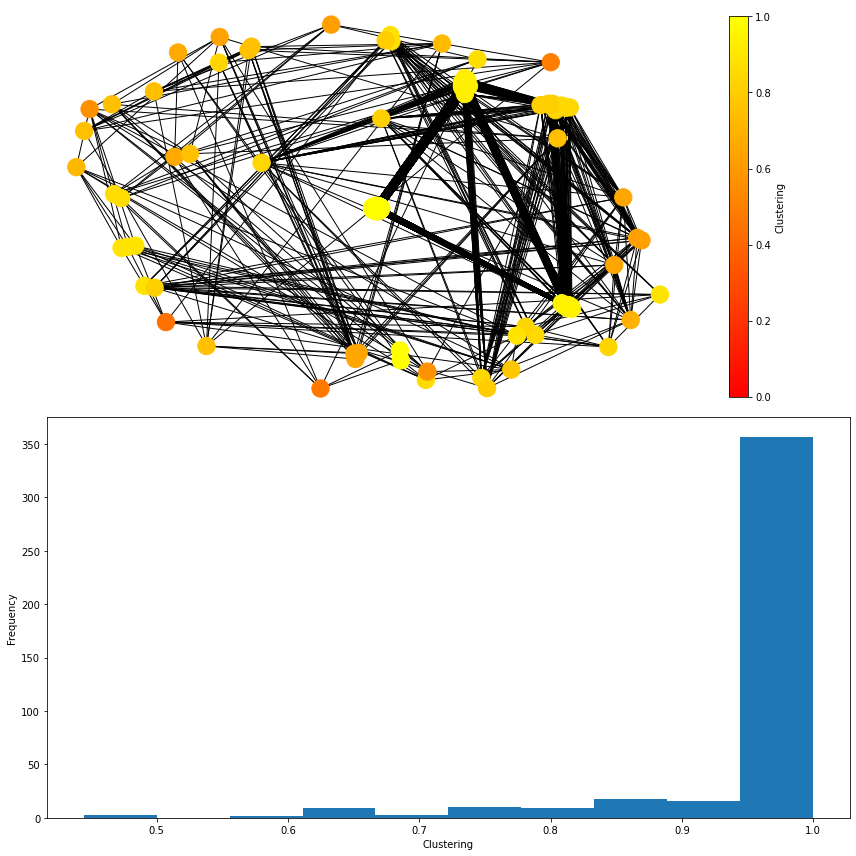

In [193]:
h.plot_cluster_distribuition(graphs_withoutSpatial[0])


## Evaluation
1. Find the cluster that represents the liver
2. Extract the cluster
3. Compare it to the ground truth

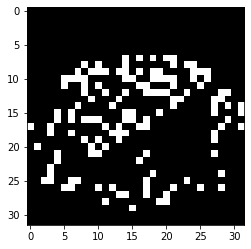

In [165]:
cluster = 4 # update this to look at a different cluster

cluster_image = h.get_cluster_image(labels, image.shape, cluster=cluster)

plt.imshow(cluster_image, cmap="gray")
plt.show()

In [166]:
jaccard, precision, sensitivity = h.get_evaluation_scores(cluster_image, gt_image)

print("Jaccard: {:.2f}".format(jaccard))
print("Precision: CLASS 0: {:.4f}, CLASS 1: {:.4f}".format(precision[0], precision[1]))
print("Sensitivity: CLASS 0: {:.4f}, CLASS 1: {:.4f}".format(sensitivity[0], sensitivity[1]))

Jaccard: 0.17
Precision: CLASS 0: 0.8944, CLASS 1: 0.2836
Sensitivity: CLASS 0: 0.8924, CLASS 1: 0.2879


In [187]:
dc = h.get_hausdorff_dist(cluster_image, gt_image)
# I kept the Dice since it's a bit different from f.score and more populare in segmentation
hd = h.get_dice_coeff(cluster_image, gt_image)
print(hd)
print(dc)

14.212670403551895
